In [114]:
import pandas as pd
import pandas_profiling as pp

In [115]:
df = pd.read_csv('../setup-mysql-data/morocco.csv')
df.head()

,year,city,country,avg_temp
0,1763,Casablanca,Morocco,16.36
1,1764,Casablanca,Morocco,18.95
2,1765,Casablanca,Morocco,17.27
3,1766,Casablanca,Morocco,17.34
4,1767,Casablanca,Morocco,17.28


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      251 non-null    int64  
 1   city      251 non-null    object 
 2   country   251 non-null    object 
 3   avg_temp  248 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 8.0+ KB


In [118]:
df.isnull().sum()

year        0
city        0
country     0
avg_temp    3
dtype: int64

In [119]:
df = df.dropna(how='any' ,axis=0)

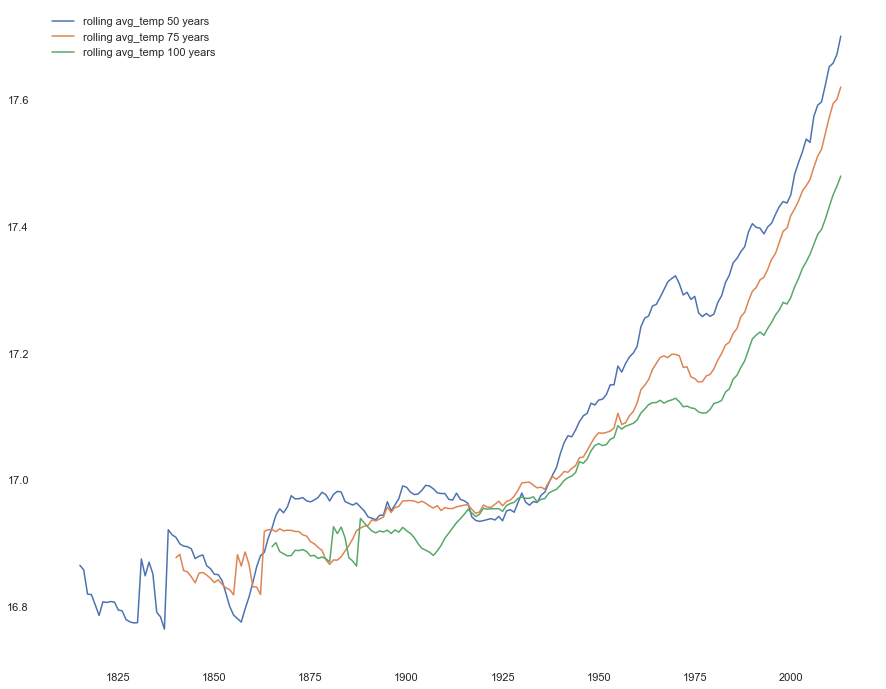

In [263]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.figure(figsize=(15,12))
ax = plt.axes()
ax.set_facecolor("white")
plt.plot(df['year'] , df['avg_temp'].rolling(50).mean()  , label='Local rolling avg_temp 50 years')
plt.plot(df['year'] , df['avg_temp'].rolling(75).mean() ,  label='Local rolling avg_temp 75 years')
plt.plot(df['year'] , df['avg_temp'].rolling(100).mean()  ,  label='Local rolling avg_temp 100 years')
plt.legend(loc=2)


In [206]:
df_global = pd.read_csv('../setup-mysql-data/global_data.csv')
df_global.head()

,year,avg_temp
0,1750,8.72
1,1751,7.98
2,1752,5.78
3,1753,8.39
4,1754,8.47


In [207]:
df_global.isnull().sum()

year        0
avg_temp    0
dtype: int64

In [208]:
df['year'].describe()

count     248.000000
mean     1889.314516
std        72.039898
min      1763.000000
25%      1827.750000
50%      1889.500000
75%      1951.250000
max      2013.000000
Name: year, dtype: float64

In [212]:
df_global = df_global[ (df_global['year'] >=1763) & (df_global['year'] <= 2013) ]

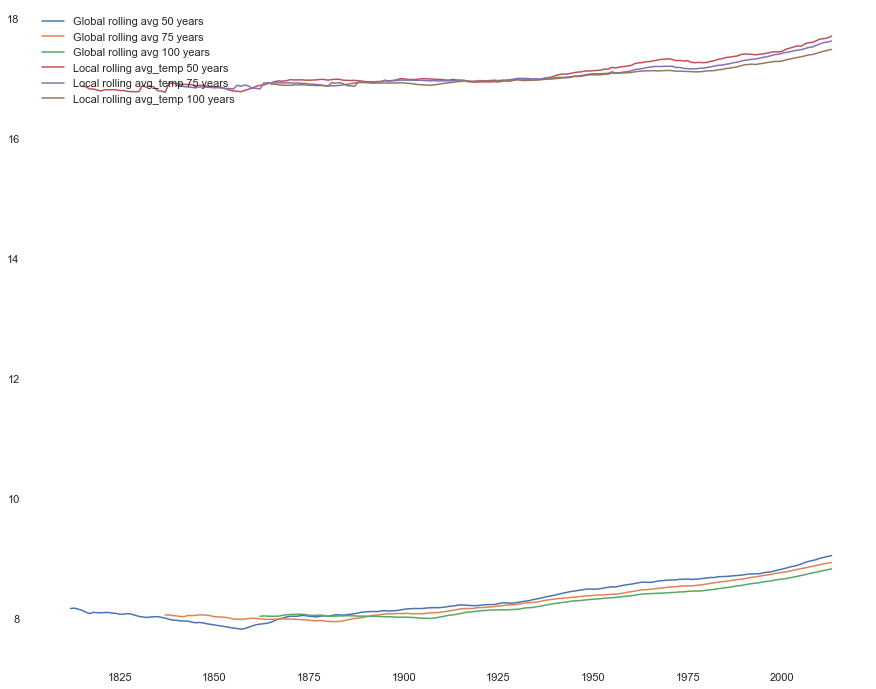

In [265]:
##FIG (2)
plt.figure(figsize=(15,12))
ax = plt.axes()
ax.set_facecolor("white")
#plt.plot(df['year'] , df['avg_temp'] )
plt.plot(df_global['year'] , df_global['avg_temp'].rolling(50).mean() , label='Global rolling avg 50 years' )
plt.plot(df_global['year'] , df_global['avg_temp'].rolling(75).mean() , label='Global rolling avg 75 years' )
plt.plot(df_global['year'] , df_global['avg_temp'].rolling(100).mean() , label='Global rolling avg 100 years' )
plt.plot(df['year'] , df['avg_temp'].rolling(50).mean()  , label='Local rolling avg_temp 50 years')
plt.plot(df['year'] , df['avg_temp'].rolling(75).mean() ,  label='Local rolling avg_temp 75 years')
plt.plot(df['year'] , df['avg_temp'].rolling(100).mean()  ,  label='Local rolling avg_temp 100 years')
plt.legend(loc=2)


In [185]:
df['growth rate'] = df.avg_temp.pct_change()

C:\Users\EL_GHI~1\AppData\Local\Temp/ipykernel_15892/3602172573.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [234]:
df_global['growth rate'] = df_global.avg_temp.pct_change()

In [239]:
df['growth rate'].describe()

count    247.000000
mean       0.003431
std        0.080529
min       -0.487093
25%       -0.017833
50%       -0.001183
75%        0.018366
max        0.869803
Name: growth rate, dtype: float64

In [240]:
df_global['growth rate'].describe()

count    250.000000
mean       0.001762
std        0.039182
min       -0.175182
25%       -0.018453
50%        0.003415
75%        0.021155
max        0.134218
Name: growth rate, dtype: float64

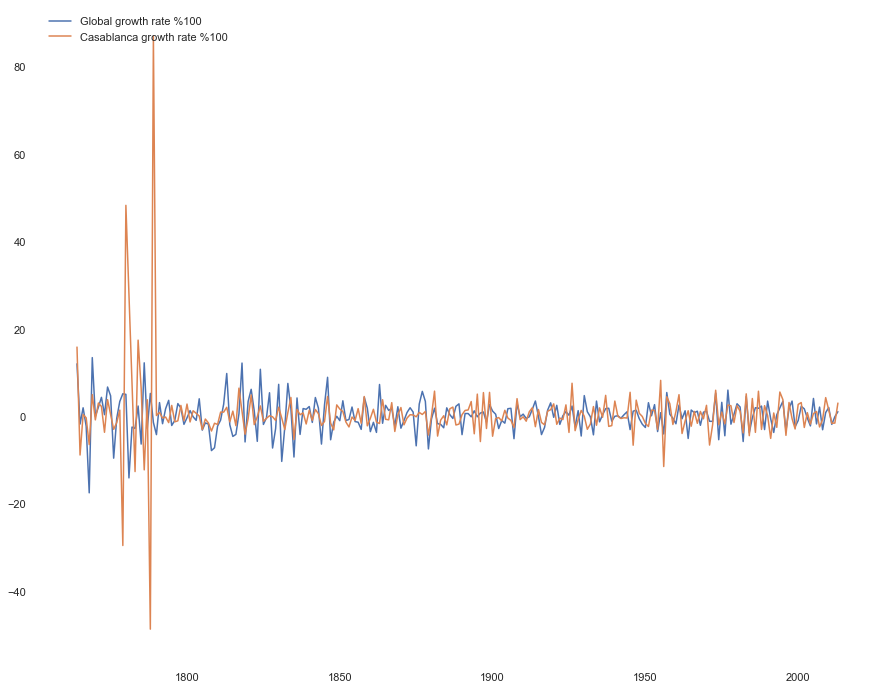

In [262]:
plt.figure(figsize=(15,12))
ax = plt.axes()
ax.set_facecolor("white")
plt.plot(df_global['year'] , df_global['growth rate'].mul(100) , label='Global growth rate %100' )
plt.plot(df['year'] , df['growth rate'].mul(100) , label='Casablanca growth rate %100' )
plt.legend(loc=2)

My Observations:

    +Diffrances:

• The Local (Casablanca) is hotter than global temperature (refer :FIG (2)).

• The Global Temperature levels have a smaller variance than Local (Indore) temperature changes. (ref : df['growth rate'].describe() and df_global['growth rate'].describe())

    +Similarities:

• The Local (Casablanca) is increasing and the Global temperature is also increasing

• after 1860 bith the temperature of local and global are increasing

